In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)

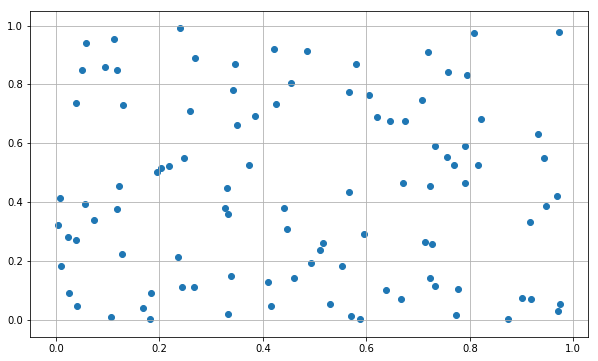

In [2]:
length = 100
r1 = np.random.rand(length)
r2 = np.random.rand(length)
plt.scatter(r1, r2)
plt.grid(True)
plt.show()

In [12]:
a = np.array( [
        [10, 11, 12, 13, 14],
        [20, 21, 22, 23, 24],
        [30, 31, 32, 33, 34]] )
bs = np.array( [0, 1, 2, 0, 1])
b = a[bs, np.arange(5)]
b

array([10, 21, 32, 13, 24])

In [83]:
def rf_discrete( count, probabilities ):
    return np.random.choice( len( probabilities ), count, p=probabilities )

def rf_binary( count, one_probability ):
    return rf_discrete( count, [1 - one_probability, one_probability] )

def rf_select( indexes, sources ):
    count = len( indexes )
    adjusted = sources[:]
    for i, x in enumerate( adjusted ):
        if np.isscalar( x ):
            adjusted[i] = np.full( count, x )
    return np.array( adjusted )[np.array( indexes ), np.arange( count )]

def rf_salt( a, p ):
    a1 = rf_discrete( len( a ), [p, 1 - p] )
    return rf_select( a, [0, a1] )

def rf_pepper( a, p ):
    a0 = rf_discrete( len( a ), [1 - p, p] )
    return rf_select( a, [a0, 1] )

def rf_random( count ):
    np.random.random( count )

n = 30

a = rf_discrete( n, [0.7, 0.2, 0.1] )
print( a )
print()

b1 = rf_salt( rf_pepper( rf_select( a, [1, 0, 0] ), 0.1 ), 0.1 )
b1 = rf_salt( rf_pepper( rf_select( a, [1, 0, 0] ), 0.1 ), 0.1 )
b1 = rf_salt( rf_pepper( rf_select( a, [1, 0, 0] ), 0.1 ), 0.1 )
b1 = rf_salt( rf_pepper( rf_select( a, [1, 0, 0] ), 0.1 ), 0.1 )
b1 = rf_salt( rf_pepper( rf_select( a, [1, 0, 0] ), 0.1 ), 0.1 )
b1 = rf_salt( rf_pepper( rf_select( a, [1, 0, 0] ), 0.1 ), 0.1 )
b2 = rf_salt( rf_pepper( rf_select( a, [1, 1, 0] ), 0.1 ), 0.1 )
b3 = rf_salt( rf_pepper( rf_select( a, [1, 1, 0] ), 0.1 ), 0.1 )
b4 = rf_salt( rf_pepper( rf_select( a, [0, 1, 0] ), 0.1 ), 0.1 )
b5 = rf_salt( rf_pepper( rf_select( a, [0, 0, 1] ), 0.1 ), 0.1 )
b6 = rf_salt( rf_pepper( rf_select( a, [0, 0, 1] ), 0.1 ), 0.1 )
b7 = rf_salt( rf_pepper( rf_select( a, [0, 0, 1] ), 0.1 ), 0.1 )
print( b1 )
print( b2 )
print( b3 )
print( b4 )
print( b5 )
print( b6 )
print( b7 )
print()


[0 2 1 0 0 1 1 1 0 2 0 0 1 0 0 0 0 0 1 0 1 1 0 2 0 0 0 1 0 0]

[1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1]
[1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0]
[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1]
[0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0]
[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
[0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0]

